<p style='text-align:center; font-size:22px'>
Windows on the brain <b>methods lecture by Malte Güth</b>, Fall 2019

<center>

<img style='width: 400px' src='https://github.com/MalteGueth/PhaseAmplitudeCoupling/blob/master/pictures/PFC_MTL.png?raw=true' />

<center>
    
</p>
<p>
<p>

<p style='text-align:center; font-size:22px; margin-bottom: 24px;'><b>Cross Frequency Modulation: Phase Amplitude Coupling between Theta and Gamma bands</b></p>

<p style='text-align:center; font-size:22px; margin-bottom: 24px;'>
Github repository: https://github.com/MalteGueth/PhaseAmplitudeCoupling

<p style='text-align:center; font-size:18px; margin-bottom: 32px;'><b>December 12th, 2019</b></p>

<hr style='height:5px;border:none' />

<center>
<img style='width: 900px' src='https://github.com/MalteGueth/PhaseAmplitudeCoupling/blob/master/pictures/outline.png?raw=true' />
<center>

# 1. Pre-requisites
<hr style="height:1px;border:none" />

Before we get started, some basics on this presentation:

### 1. Python: 
Open source, easy to learn programming language, popular for many neuroimaging techniques such as fMRI, MEG or EEG

### 2. Jupyter Notebook: 
A **Jupyter notebook** is an interactive document that lets you run Python right there in your document. It is an ideal tool for learning how to code and demonstrating outputs and plots generated by a code. You can view Jupyter notebook documents (with **`.ipynb`** extension) on **GitHub** with your web browser. However, in order to run code snippets on a Jupyter notebook document, you need to open the **`.ipynb`** document on your computer (or your Docker container).

# Jupyter start-up screen
<hr style="height:1px;border:none" />

<img src="https://github.com/sathayas/JupyterfMRIFall2019/blob/master/Images/Jupyter_StartUp.png?raw=true" alt="Starting up Jupyter notebook" style="width: 500px;"/>

Using the file browser **within your web browser** (not the browser's menu), find a Jupyter notebook document.
This is a special version of a notebook that combines slides with interactive code. Press **Space** or click on the **arrows in the lower right corner** to navigate through the slides. Press **Shift + Space** to move backwards.

# Code cells
<hr style="height:1px;border:none" />


Within a notebook document, there are some codes that can be executed on the spot. You simply find the code snippet, a box with **`In [ ]:`** on the left margin.

Give it a shot! Click on the cell and press **Shift + Enter** to execute a cell.

In [1]:
print('Hello World!')

Hello World!


## Editing and re-running a code cell
You can edit and re-run the code within the notebook as well. Just click on the text of the code cell (so that it's green) and make an edit. 

Here, I am changing the variable **`yourname`** from **`Malte`** to **`class`**. Then I can just re-run the code by clicking on the run button again.

In [2]:
yourname = 'class'
print("Hello, " + yourname + "!!")

Hello, class!!


<p style='text-align:center; font-size:34px'>
<b>Good job!</b>
    
<center>

<img style='width: 320px; padding: 0px;' src='https://github.com/MalteGueth/PhaseAmplitudeCoupling/blob/master/pictures/wellDone.jpeg?raw=true'>

<center>

<p style='text-align:center; font-size:34px'>
<b>Moving on ...</b>

# 2. Cross Frequency Couplings
<hr style="height:1px;border:none" />


<p style='text-align:left; font-size:24px'>
The interaction between the properties of two distinct frequency bands (e.g. Cohen, 2008; Canolty & Knight, 2010). 


<table><tr><td><img src='https://github.com/MalteGueth/PhaseAmplitudeCoupling/blob/master/pictures/crossFrequTypes.jpg?raw=true' style='align="left"; width: 860px;'></td><td><img src='https://github.com/MalteGueth/PhaseAmplitudeCoupling/blob/master/pictures/PFC_MTL.png?raw=true'style='align="left"; width: 500px;'></td></tr></table>


<p style='text-align:left; font-size:18px'>
Jensen & Colgin, 2007 (Fig. 1)

### Phase Amplitude Coupling
<hr style="height:1px;border:none" />

<p style='text-align:left; font-size:22px'>
The amplitude of power in one frequency band is modulated by the phase of a lower frequency band (Canolty et al., 2006; Isomura et al., 2006; Buzsaki & Draguhn, 2004; Chrobak & Buzsaki, 1998).

<table><tr><td><img src='https://github.com/MalteGueth/PhaseAmplitudeCoupling/blob/master/pictures/phase_amp_coupling.png?raw=true' style='align="left"; width: 400px;'></td><td></tr></table>

<p style='text-align:left; font-size:18px'>
Daume, Gruber, Engel, & Friese, 2017 (Fig. 3)

# 3. Methods example
<hr style="height:1px;border:none" />


## Load the libraries
<hr style="height:1px;border:none" />


In [3]:
# Environment, data import and loop handling
import os
import glob

# Math and data management
import numpy as np
import pandas as pd
import math

# EEG and fMRI specifics
import mne
from mne.time_frequency import tfr_morlet
from mne.stats import permutation_cluster_test
from tensorpac.signals import pac_signals_wavelet

# Visualization
import matplotlib.pyplot as plt
from visbrain.objects import PacmapObj, SceneObj

## Set up the environment
<hr style="height:1px;border:none" />


In [36]:
# Set working directory
os.chdir('/Users/maltegueth/windows_demo/')

# Define paths and load the data
output_dir = './output'
data_path = '/Users/maltegueth/windows_demo/data/eeg/'
file = 'pilot-epo.fif'

## An overview of the EEG data
<hr style="height:1px;border:none" />


In [37]:
data = mne.read_epochs(data_path + file)
data.info

Reading /Users/maltegueth/windows_demo/data/eeg/pilot-epo.fif ...
    Found the data of interest:
        t =    -200.00 ...     600.00 ms
        0 CTF compensation matrices available
188 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated


<Info | 19 non-empty fields
    bads : list | 0 items
    ch_names : list | E1, E2, E3, E4, E5, E6, E7, E8, E9, ...
    chs : list | 258 items (EEG: 256, ECG: 1, STIM: 1)
    comps : list | 0 items
    custom_ref_applied : bool | True
    dev_head_t : Transform | 3 items
    dig : Digitization | 259 items (3 Cardinal, 256 EEG)
    events : list | 0 items
    file_id : dict | 4 items
    highpass : float | 1.0 Hz
    hpi_meas : list | 0 items
    hpi_results : list | 0 items
    lowpass : float | 60.0 Hz
    meas_date : tuple | 2000-01-01 00:00:00 GMT
    meas_id : dict | 4 items
    nchan : int | 258
    proc_history : list | 0 items
    projs : list | 0 items
    sfreq : float | 1000.0 Hz
    acq_pars : NoneType
    acq_stim : NoneType
    ctf_head_t : NoneType
    description : NoneType
    dev_ctf_t : NoneType
    device_info : NoneType
    experimenter : NoneType
    gantry_angle : NoneType
    helium_info : NoneType
    hpi_subsystem : NoneType
    kit_system_id : NoneType
    lin

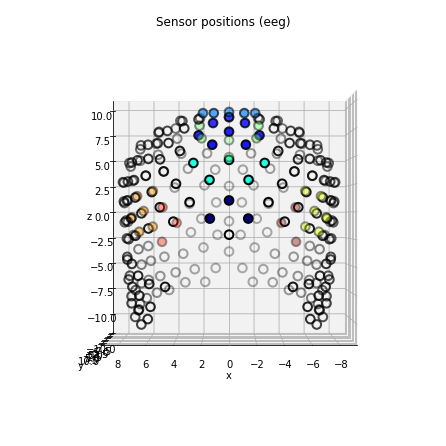

In [7]:
ch_groups = [[25, 31, 24],
             [14, 21, 13, 15, 6, 7, 5, 22],
             [8, 44, 80, 131, 185],
             [20, 26, 19, 27, 13, 12],
             [100, 99, 128, 118, 88, 129],
             [95, 84, 83, 94, 105, 96],
             [169, 170, 178, 177, 168, 160],
             [159,167,158],
             [113,106,114]]

data.plot_sensors(kind='3d', ch_groups=ch_groups, show_names=False);

<img src="https://github.com/MalteGueth/EEG_fMRI_tmaze/blob/master/tmaze.png?raw=true" alt="Starting up Jupyter notebook" style="width: 500px;"/>

In [9]:
event_id = {'reward_left/maze': 101, 'reward_right/maze': 102,
            'noreward_left/maze': 103, 'noreward_right/maze': 104,
            'reward_miss/maze': 105, 'noreward_miss/maze': 106,
            'reward_left/nomaze': 201, 'reward_right/nomaze': 202,
            'noreward_left/nomaze': 203, 'noreward_right/nomaze': 204,
            'reward_miss/nomaze': 205, 'noreward_miss/nomaze': 206}

tmin, tmax = -0.2, 0.8
tminTF, tmaxTF = -2.5, 2.5
baseline = -0.2, 0.0
reject = dict(eeg=100)

<ipython-input-11-f75d6b487d23>:2: RuntimeWarning: event 13 missing from event_id will be ignored
  mne.viz.plot_events(events[:400], sfreq=data.info['sfreq'], event_id=event_id);
<ipython-input-11-f75d6b487d23>:2: RuntimeWarning: More events than colors available. You should pass a list of unique colors.
  mne.viz.plot_events(events[:400], sfreq=data.info['sfreq'], event_id=event_id);


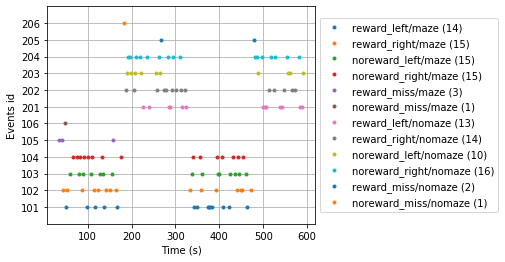

In [11]:
events = mne.read_events('./data/behavior/pilot-eve.fif')
mne.viz.plot_events(events[:400], sfreq=data.info['sfreq'], event_id=event_id); 

In [38]:
FCz = [14]
PO8 = [168]

diff = mne.combine_evoked((data['noreward_left/maze', 'noreward_right/maze'].average(), 
                           data['reward_left/maze', 'reward_right/maze'].average()), [1,-1])

colors = dict(Reward = 'darkblue', No_reward = 'darkred', 
              Difference_Wave = 'black')
colors_alley = dict(Right = 'darkblue', Left = 'darkred')

feed_dict = {'Reward': data['reward_left/maze', 'reward_right/maze'].average(), 
            'No_reward': data['noreward_left/maze', 'noreward_right/maze'].average(), 
             'Difference_Wave': diff}
alley_dict = {'Right': data['reward_right/maze', 'noreward_right/maze'].average(), 
              'Left': data['reward_left/maze', 'noreward_left/maze'].average()}

linestyles = dict(Reward = '-', No_reward = '--', 
                  Difference_Wave = '-')
linestyles_alley = dict(Right = '-', Left = '--')

ylim = dict(eeg=[-4,4])
ylim_alley = dict(eeg=[-4,4])

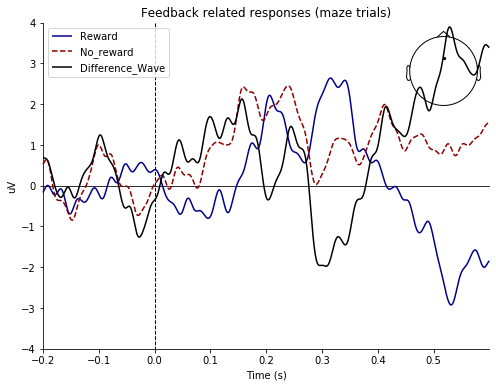

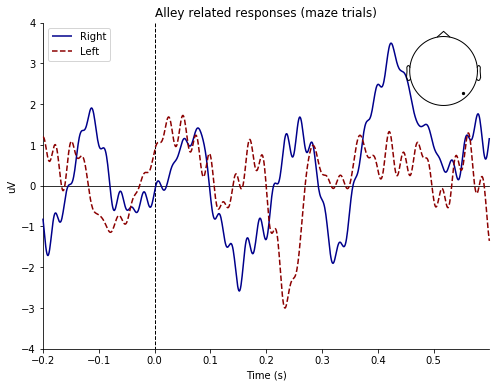

In [39]:
fig1=mne.viz.plot_compare_evokeds(feed_dict, picks=FCz, 
                                  truncate_yaxis=False, truncate_xaxis=False,
                                  colors=colors, linestyles=linestyles,
                                  invert_y=False, ylim = ylim,
                                  title='Feedback related responses (maze trials)',
                                  show_sensors=True);

fig2=mne.viz.plot_compare_evokeds(alley_dict, picks=PO8, 
                                  truncate_yaxis=False, truncate_xaxis=False,
                                  colors=colors_alley, linestyles=linestyles_alley,
                                  invert_y=False, ylim = ylim_alley,
                                  title='Alley related responses (maze trials)',
                                  show_sensors=True);

    Using multitaper spectrum estimation with 7 DPSS windows


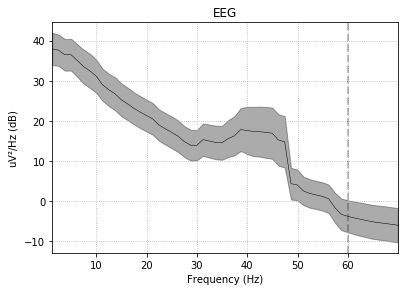

In [31]:
fmin = 1
fmax = 70

data['reward_left/maze', 'reward_right/maze'].plot_psd(fmin=fmin, fmax=fmax); 

## Plot results for single subject
<hr style="height:1px;border:none" />


In [2]:
tfr_reward_maze = mne.time_frequency.read_tfrs(data_path+'tfr_reward_maze-tfr.h5')
tfr_noreward_maze = mne.time_frequency.read_tfrs(data_path+'tfr_noreward_maze-tfr.h5')

tfr_right_maze = mne.time_frequency.read_tfrs(data_path+'tfr_right_maze-tfr.h5')
tfr_left_maze = mne.time_frequency.read_tfrs(data_path+'tfr_left_maze-tfr.h5') 

NameError: name 'mne' is not defined

<p style='text-align:center; font-size:24px'>
Reward (upper panel) vs. No Reward (lower panel) for pilot subject. 

<center>

<img src="https://github.com/MalteGueth/PhaseAmplitudeCoupling/blob/master/pictures/sub1_feedTF.png?raw=true" style="width: 700px;"/>

<center>

No baseline correction applied


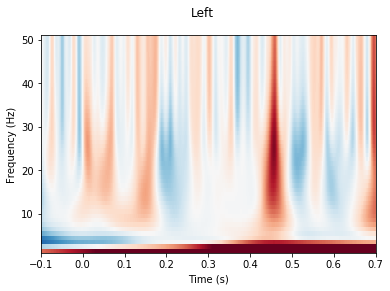

In [23]:
mne.time_frequency.AverageTFR.plot(tfr_left_maze[0],[159], dB=False,
                                   baseline=None, colorbar=False,
                                   tmin=data.times[2400], tmax=data.times[3200],
                                   fmin=0, fmax=50., vmin=-.4, vmax=.4, title='Left');



In [1]:
tfr_right_maze[0].plot_topomap(fmin=4, fmax=8, tmin=.1, tmax=.15, title='theta right alley (4-8 Hz)', vmin=-.4, vmax=.4, 
                                colorbar=False, sensors=False);

tfr_left_maze[0].plot_topomap(fmin=4, fmax=8, tmin=.1, tmax=.15, title='theta left alley (4-8 Hz)', vmin=-.4, vmax=.4, 
                                  colorbar=False, sensors=False);

NameError: name 'tfr_right_maze' is not defined

## A priori phase amplitude coupling
<hr style="height:1px;border:none" />


In [ ]:
epochs = mne.read_epochs(data_path+'pilotTF-epo.fif')
data = epochs.average().data

# Define specific frequencies 
freq4phase = 6
freq4power = 40

# Define indices of channels to be analyzed
sensorIDX1 = 167
sensorIDX2 = 18

In [ ]:
# Define wavelet parameters
wtmin = -1
wtmax = 1

time = np.arange(wtmin, wtmax+.001, 1/epochs.info['sfreq'])
half_of_wavelet_size = (wtmax-1)/2
n_wavelet = time.size
points = int(epochs.info['sfreq']*(tmax+(tmin*-1))+1)

n_data = points*len(data)
n_convolution = n_wavelet+n_data-1

# Get FFT of EEG data
fft_p08 = np.fft.fft(data[:,sensorIDX1,:], n_convolution)
fft_fp2 = np.fft.fft(data[:,sensorIDX2,:], n_convolution)

In [96]:
wavelet4phase = np.exp(2 * 1j * np.pi * freq4phase * time)*np.exp(-time ** 2 / (2 * (4 / (2 * np.pi * freq4phase)) ** 2))
fft_wavelet4phase = np.fft.fft(wavelet4phase, n_convolution);

wavelet4power = np.exp(2 * 1j * np.pi * freq4power * time)*np.exp(-time ** 2 / (2 * (4 / (2 * np.pi * freq4power)) ** 2))
fft_wavelet4power = np.fft.fft(wavelet4power, n_convolution);

convolution_result_fft = np.fft.ifft(fft_wavelet4phase * fft_p08, n_convolution);
phase = np.angle(convolution_result_fft[half_of_wavelet_size+1 : len(convolution_result_fft)-half_of_wavelet_size]);

convolution_result_fft = np.fft.ifft(fft_wavelet4power * fft_fp2, n_convolution);
pwr = np.abs(convolution_result_fft[half_of_wavelet_size+1 : len(convolution_result_fft)-half_of_wavelet_size]) ** 2;

In [ ]:
obsPAC = np.abs(np.mean(pwr * np.exp(1j * phase)))
obsPAC_bias = np.abs(np.mean(power_bias * np.exp(1j * phase_bias)))

num_iter = 1000

permutedPAC = np.zeros(2, num_iter);

for i in np.arange(1,num_iter):

    random_timepoint = randsample(round(length(eeg) * .8), 1) + round(length(eeg) * .1);
    random_timepoint_bias = randsample(round(length(power_bias) * .8), 1) + round(length(power_bias) * .1);

    timeshiftedpwr = [pwr(random_timepoint:end) pwr(1: random_timepoint - 1)];
    timeshiftedpwr_bias = [power_bias(random_timepoint_bias:end) power_bias(1: random_timepoint_bias - 1)];

    permutedPAC[0, i] = np.abs(np.mean(timeshiftedpwr * np.exp(1j * phase)))
    permutedPAC[1, i] = np.abs(np.mean(timeshiftedpwr_bias * np.exp(1j * phase_bias)))

pacz[0] = (obsPAC - np.mean(permutedPAC[0,:])) / np.std(permutedPAC[0,:]);
pacz[1] = (obsPAC_bias - np.mean(permutedPAC[1,:])) / np.std(permutedPAC[1,:]);

np.savetxt('./windows_demo/output/pacz_pilot.txt', pacz, delimiter=',')

## Mixed a priori / exploratory Phase Amplitude Coupling
<hr style="height:1px;border:none" />


In [24]:
sc = SceneObj(size=(1200, 600))

srate = 1000
pac = np.loadtxt('/Users/maltegueth/windows_demo/output/pac.txt', delimiter=',')

pac_obj_como = PacmapObj('como', pac, sf=srate, f_pha=(1, 20, 1, .5),
                         f_amp=(1, 60, 10, 1), interpolation='bicubic')
sc.add_to_subplot(pac_obj_como, row=0, col=0, zoom=.9, title='Comodulogram')

pac_pha_como = PacmapObj('como', pac, sf=srate, f_pha=(1, 20, 1, .5),
                         f_amp=[1., 60.], n_window=600, cmap='plasma')
sc.add_to_subplot(pac_pha_como, row=0, col=1, zoom=.9,
                  title='Optimal phase frequency')

pac_amp_como = PacmapObj('como', pac, sf=srate, f_pha=[1, 20],
                         f_amp=(1, 60, 10, 1), n_window=600, cmap='inferno')
sc.add_to_subplot(pac_amp_como, row=0, col=2, zoom=.9,
                  title='Optimal amplitude frequency')

Creation of a scene
PacmapObj(name='como') created
Phase Amplitude Coupling object defined
    Extract phases (n_pha=36) and amplitudes (n_amps=49)
    true PAC estimation using ndPac (Ozkurt et al. 2012)
    PacmapObj(name='como') added to the scene
PacmapObj(name='como') created
Phase Amplitude Coupling object defined
    Extract phases (n_pha=36) and amplitudes (n_amps=1)
    true PAC estimation using ndPac (Ozkurt et al. 2012)
    PacmapObj(name='como') added to the scene
PacmapObj(name='como') created
Phase Amplitude Coupling object defined
    Extract phases (n_pha=1) and amplitudes (n_amps=49)
    true PAC estimation using ndPac (Ozkurt et al. 2012)
    PacmapObj(name='como') added to the scene


WARNING | dpi parameter is not active if `print_size` is None. Use for example `print_size=(5, 5)`


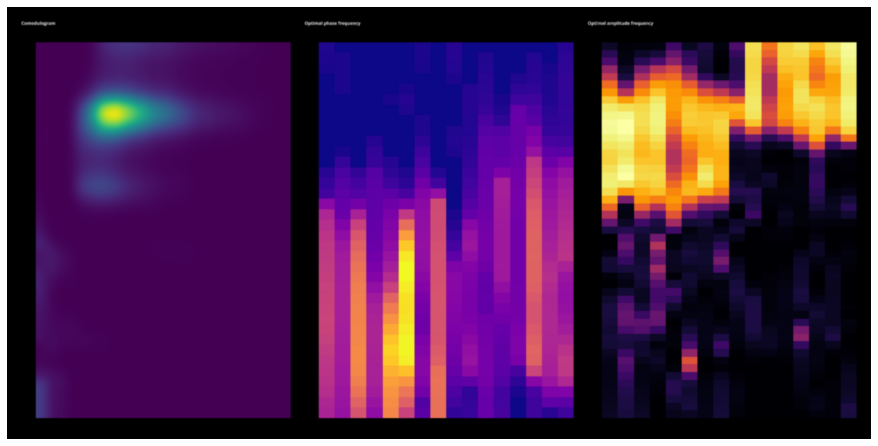

In [25]:
sc.preview()

# 4. Discussion and further applications
<hr style="height:1px;border:none" />

### Adding data from an fMRI GLM
<hr style="height:1px;border:none" />

GLM stands for **general linear model**. It is a statistical model that can be used for different types of analyses:
  * ANOVA (analysis of variance): Comparison of group means
  * ANCOVA (analysis of covariance): ANOVA adjusted for continuous variables
  * Linear regression, simple & multiple
  * T-test: Statistical test on mean(s)
  * F-test: Statistical test to compare variances
  
<img style='width: 500px; padding: 0px;' src='https://github.com/sathayas/JupyterfMRIFall2019/blob/master/Images/Level1_GLMSimple.png?raw=true' alt='GLM for simple regression'/>

For your fMRI experiment data, you can fit such a model at each voxel separately.

<img style='width: 400px; padding: 0px;' src='https://github.com/sathayas/JupyterfMRIFall2019/blob/master/Images/Level1_GLMSimple_fMRI.png?raw=true' alt='GLM for simple regression, fMRI'/>



### Extracting time series data for left right contrasts in the maze and relating it to Phase Amplitude Coupling.

<table><tr><td><img src='https://ars.els-cdn.com/content/image/1-s2.0-S1053811916304219-gr7.jpg?raw=true' style='align="left"; width: 660px;'></td><td><img src='https://github.com/MalteGueth/PhaseAmplitudeCoupling/blob/master/pictures/PFC_MTL.png?raw=true'style='align="left"; width: 500px;'></td></tr></table>

<p style='text-align:left; font-size:18px'>
Murta et al., 2016 (Fig. 7)

## You made it! Thanks for listening!

<img style='width: 600px; padding: 0px;' src='https://vignette.wikia.nocookie.net/looneytunes/images/e/e1/All.jpg/revision/latest?cb=20150313020828?raw=true' />

And if you want to take this home...

```
ipython nbconvert --to html PhaseAmplitudeCoupling.ipynb  
jupyter nbconvert --to html PhaseAmplitudeCoupling.ipynb
```

```
wkhtmltopdf PhaseAmplitudeCoupling.html PhaseAmplitudeCoupling.pdf   
```